In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.feature_selection import f_classif, SelectKBest, f_regression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier

In [2]:
GDSC_info = pd.read_csv("GDSC_PDX_Paclitaxel_info.csv")
GDSC_data = pd.read_csv("GDSC_PDX_Paclitaxel.csv")
CCLE_PDX = pd.read_csv("CCLE_PDX_Paclitaxel.csv")

# Data cleaning

In [17]:
GDSC_info = GDSC_info.iloc[:, 1:]
GDSC_info["label"] = GDSC_info["IC50"] < GDSC_info["MAX_CONC_MICROMOLAR"]
GDSC_info["label"] = GDSC_info["label"].apply(lambda x: "S" if x is True else "R")
print(GDSC_info.columns)
print(GDSC_info.head())

Index(['CELL_LINE_NAME', 'MAX_CONC_MICROMOLAR', 'IC50', 'label'], dtype='object')
  CELL_LINE_NAME  MAX_CONC_MICROMOLAR      IC50 label
0         MC-CAR               0.1024  0.026059     S
1            ES3               0.1024  0.823045     R
2            ES5               0.1024  1.132950     R
3            ES7               0.1024  1.119814     R
4          EW-11               0.1024  2.753277     R


In [18]:
correct_cols = ["CELL_LINE_NAME"]
correct_cols.extend(GDSC_data.columns[1:])
GDSC_data.columns = correct_cols

print(GDSC_data.columns)
GDSC_data.head()

Index(['CELL_LINE_NAME', 'TSPAN6', 'TNMD', 'DPM1', 'SCYL3', 'C1orf112', 'FGR',
       'CFH', 'FUCA2', 'GCLC',
       ...
       'MRPL46', 'HPR', 'MIA', 'LINC00514', 'OR1D5', 'ZNF234', 'MYH4',
       'LINC00526', 'KRT18P55', 'TBC1D3P5'],
      dtype='object', length=16191)


,CELL_LINE_NAME,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,...,MRPL46,HPR,MIA,LINC00514,OR1D5,ZNF234,MYH4,LINC00526,KRT18P55,TBC1D3P5
0,MC-CAR,-1.184016,0.468235,0.485299,0.951035,0.705346,3.574280,-0.334766,-0.167187,-0.829344,...,0.639887,0.113480,0.157138,-0.504232,0.283905,-0.785013,0.443411,0.684380,-0.006255,1.037289
1,SK-ES-1,0.949128,-0.099122,-1.142175,0.221316,0.582377,-0.500133,0.163121,-1.660569,-0.434605,...,-0.518210,-1.023453,-0.407149,-0.924217,-0.198564,-0.366830,-0.151292,0.246662,-0.534830,-0.214098
2,8-MG-BA,0.788220,0.840168,0.628150,-1.331285,-0.248648,-0.386293,-0.297668,0.815664,-0.212430,...,-1.083025,0.357081,-0.078537,-0.376219,-0.914794,0.283323,-0.551244,-0.333331,0.038996,-0.114577
3,GB-1,0.053174,-0.648190,-0.181854,-0.633104,-0.947646,-0.469195,-0.684658,0.421926,-0.905626,...,-0.830098,-1.200791,-0.194579,-0.275438,-0.562004,0.634896,-0.366795,0.442662,-1.225924,0.757517
4,NCI-H1648,1.519261,-0.368292,0.226856,-0.179698,-0.865956,-0.440831,1.035865,0.896539,1.694665,...,0.313644,-0.783564,-0.480206,-0.311198,-0.414697,-0.112886,-0.841901,0.379371,1.731215,-1.545600


In [19]:
X = pd.merge(GDSC_data, GDSC_info, on = "CELL_LINE_NAME")
y = X["label"]
X = X.drop(columns = ['MAX_CONC_MICROMOLAR', 'IC50', "CELL_LINE_NAME", "label"])

# EDA

In [21]:
print("Ratio in each class:")
ratio = y.value_counts() / len(y) * 100
print(ratio)

Ratio in each class:
S    71.177945
R    28.822055
Name: label, dtype: float64


[]

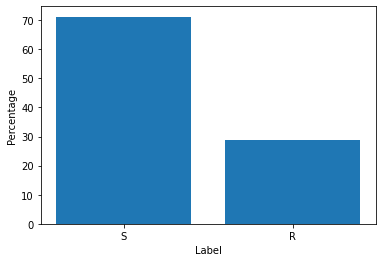

In [35]:
plt.xlabel("Label")
plt.ylabel("Percentage")
plt.bar(x = ratio.index, height=ratio)
plt.plot()

# Feature selection
- Done before normalization

### Logistic regression with L1 regularization

In [29]:
clf = LogisticRegressionCV(cv=5, penalty = "l1", solver="saga", random_state=5080).fit(X, y)

C:\Users\martin\.conda\envs\EEML\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\martin\.conda\envs\EEML\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\martin\.conda\envs\EEML\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\martin\.conda\envs\EEML\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\martin\.conda\envs\EEML\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_ite

In [30]:
acc = clf.score(X, y)
print(f"Training acc of best model = {round(acc * 100, 4)}%")
print("Cross Validation result in each parameter sets")
pd.DataFrame({"C":clf.Cs_, "Cross valid acc": clf.scores_["S"].mean(axis = 0)})

Training acc of best model = 78.6967%
Cross Validation result in each parameter sets


,C,Cross valid acc
0,0.000100,0.711772
1,0.000774,0.711772
2,0.005995,0.711772
3,0.046416,0.726867
4,0.359381,0.523924
5,2.782559,0.458639
6,21.544347,0.418544
7,166.810054,0.413544
8,1291.549665,0.401013
9,10000.000000,0.383354


In [31]:
logistic_regression_coefs = X.columns[(clf.coef_ > 0).flatten()]
print(f"There are {len(logistic_regression_coefs)} features selected by L1 logistic regression")
print(sorted(logistic_regression_coefs.tolist()))

There are 23 features selected by L1 logistic regression
['ANKFY1', 'C2orf68', 'CEP128', 'CHST2', 'GABPA', 'GYS2', 'HDAC1', 'ITGA4', 'JARID2', 'MDM1', 'OLFML2A', 'PPP3CB', 'PRIM2', 'PRPF4B', 'PTGES3', 'RAP2B', 'SMC6', 'TIMELESS', 'TRDMT1', 'TRIM25', 'TSLP', 'UBE2G1', 'ZNF318']


## Anova F-test

In [6]:
anova_selector = SelectKBest(score_func=f_classif, k=20)
anova_selector.fit(X, y)

SelectKBest(k=20, score_func=<function f_classif at 0x0000024B9FCCE948>)

In [33]:
num_selected_features = 20
anova_df = pd.DataFrame({"feature_names":X.columns, "scores":anova_selector.scores_})
anova_df = anova_df.sort_values(by = ["scores"], ascending=False)
print(f"Top {num_selected_features} selected by anova classification are")
print(anova_df[:num_selected_features]["feature_names"].tolist())
anova_df[:num_selected_features]

Top 20 selected by anova classification are
['ABCB1', 'DOK4', 'SEZ6L2', 'PRPF4B', 'TBX3', 'RGS5', 'GPR22', 'COLEC11', 'SLC6A2', 'TFAP2B', 'ASTN2', 'C1QL4', 'PRIM2', 'PCSK1N', 'TRIM67', 'PNMA3', 'PODXL2', 'PHYHIPL', 'CRH', 'TMEM59L']


,feature_names,scores
1553,ABCB1,37.850472
5147,DOK4,23.204110
12252,SEZ6L2,23.195214
3774,PRPF4B,22.099737
6376,TBX3,21.863028
7574,RGS5,20.846973
11811,GPR22,20.594927
4401,COLEC11,20.117862
2612,SLC6A2,20.116971
194,TFAP2B,19.249741


In [8]:
cols = ['ANKFY1', 'C2orf68', 'CEP128', 'CHST2', 'GABPA', 'GYS2', 'HDAC1', 'ITGA4', 'JARID2', 'MDM1', 'OLFML2A', 'PPP3CB', 'PRIM2', 'PRPF4B', 'PTGES3', 'RAP2B', 'SMC6', 'TIMELESS', 'TRDMT1', 'TRIM25', 'TSLP', 'UBE2G1', 'ZNF318']
anova_df[anova_df["feature_names"].isin(cols)]

,feature_names,scores
3774,PRPF4B,22.099737
7984,PRIM2,18.312901
4040,ITGA4,17.312658
8855,GABPA,15.678169
13135,RAP2B,15.423869
4219,HDAC1,15.373306
4723,TRIM25,14.618876
3166,TRDMT1,13.018185
2186,CEP128,12.860668
189,JARID2,12.538622


## Random Forest

In [93]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 250, num = 5)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 10, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
params_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'oob_score': [True]}
print(params_grid)

{'n_estimators': [100, 137, 175, 212, 250], 'max_depth': [5, 6, 7, 8, 9, 10], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2, 4], 'oob_score': [True]}


In [94]:
RFC = RandomForestClassifier(random_state = 201)
RFC_CV = GridSearchCV(estimator = RFC, param_grid = params_grid, cv = 5, verbose = 2)
RFC_CV.fit(X, y)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100, oob_score=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100, oob_score=True, total=   2.1s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100, oob_score=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100, oob_score=True, total=   2.2s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100, oob_score=True 
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100, oob_score=True, total=   2.1s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100, oob_score=True 
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100, oob_score=True, total=   2.2s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100, oob_score=True 
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100, oob_score=True, total=   2.5s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=137, oob_score=True 
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=137, oob_score=True, total=   3.1s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=137, oob_score=T

# Selecting features and data preprocessing

In [ ]:
L1_features = ['ANKFY1', 'C2orf68', 'CEP128', 'CHST2', 'GABPA', 'GYS2', 'HDAC1', 'ITGA4', 'JARID2', 'MDM1', 'OLFML2A', 'PPP3CB', 'PRIM2', 'PRPF4B', 'PTGES3', 'RAP2B', 'SMC6', 'TIMELESS', 'TRDMT1', 'TRIM25', 'TSLP', 'UBE2G1', 'ZNF318']
Anova_features = ['ABCB1', 'DOK4', 'SEZ6L2', 'PRPF4B', 'TBX3', 'RGS5', 'GPR22', 'COLEC11', 'SLC6A2', 'TFAP2B', 'ASTN2', 'C1QL4', 'PRIM2', 'PCSK1N', 'TRIM67', 'PNMA3', 'PODXL2', 'PHYHIPL', 'CRH', 'TMEM59L']
RF_features = ['ACTL7A', 'ALDH18A1', 'ABCB1', 'GYS2', 'KERA', 'TACR2', 'GPR22', 'THY1', 'FOXR1', 'C17orf64', 'MRPL14', 'NACC1', 'HSPA8', 'RBX1', 'MAP7D2', 'ATF1', 'PLCD4', 'DNAH10', 'CRH', 'HEATR4', 'ARHGDIA', 'RCC2', 'UCN3', 'FGF16', 'TMBIM6', 'PRRT4', 'SNCG', 'TRIM25', 'PRPSAP1', 'RECQL', 'TMEM203', 'VASP', 'PTOV1', 'ESPN', 'SLC7A11', 'LGALSL', 'IRAK1BP1', 'POLD2']
L1_set = set(L1_features)
Anova_set = set(Anova_features)
RF_set = set(RF_features)

In [ ]:
union_features = L1_set | Anova_set | RF_set
intersect_features = L1_set & Anova_set & RF_set
print(f"Number of union features = {len(union_features)}")
print(f"Number of intersect features = {len(intersect_features)}")

In [ ]:
#remove two features not in testing dataset
union_features.remove('ZNF318')
union_features.remove('TMEM203')
X_train = X[list(union_features)]
X_test = CCLE_PDX[list(union_features)]

In [ ]:
SS = StandardScaler()
#X_train = SS.fit_transform(X_train)
#老師給的資料怪怪的，training dataset已經被normalize過了
X_test = SS.fit_transform(X_test)

# Level One Model
- Ridge Regression
- Random Forest
- XGboost
- Support Vector Machine
- KNN

### Ridge Regression

In [ ]:
clf_LG = LogisticRegressionCV(cv=5, penalty = "l2", random_state=5080).fit(X_train, y)
acc = clf_LG.score(X_train, y)
print("Best model hyperparameter is")
print(clf_LG.C_)
print(f"Training acc of best model = {round(acc * 100, 4)}%")
print("Cross Validation result in each parameter sets")
pd.DataFrame({"C":clf_LG.Cs_, "Cross valid acc": clf_LG.scores_["S"].mean(axis = 0)})

### Random Forest

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 10)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 10, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
params_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'oob_score': [True]}

In [ ]:
RFC = RandomForestClassifier(random_state = 201)
RFC_CV = GridSearchCV(estimator = RFC, param_grid = params_grid, cv = 5, verbose = 1, n_jobs = -1)
RFC_CV.fit(X_train, y)

In [ ]:
print("Best estimators after Cross Validation is")
print(RFC_CV.best_params_)
print(f"with cross validation acc = {round(RFC_CV.best_score_, 4) * 100}%")
print(f"Training accuracy after refit= {round(RFC_CV.score(X_train, y) * 100, 4)}%")

### SVM

In [ ]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

In [ ]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=1)
grid.fit(X_train,y)

In [ ]:
print(grid.best_estimator_)

### KNN

In [ ]:
k_max = round(np.sqrt(X_train.shape[0]))
k_range = list(range(3, k_max, 3))
param_grid = {
    "n_neighbors": k_range,
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan"]
}

In [ ]:
KNN = KNeighborsClassifier()
GS = GridSearchCV(KNN, 
    param_grid, 
    verbose = 1,
    cv = 5, n_jobs = -1).fit(X_train, y)

In [ ]:
GS.best_estimator_.score(X_train, y)

In [ ]:
print(GS.best_estimator_)

# Stacking model

In [ ]:
Ridge = LogisticRegression(C = 0.04641589, penalty = "l2")
RF = RandomForestClassifier(random_state = 201, max_depth= 10,
                            min_samples_leaf= 1, min_samples_split= 5, n_estimators= 188, oob_score= True)
SVM = SVC(C=1, gamma=0.01, kernel='sigmoid')
KNN = KNeighborsClassifier(metric='manhattan', n_neighbors=3)
base_learners = [
    ("Ridge", Ridge),
    ("RF", RF),
    ("SVM", SVM),
    ("KNN", KNN)
]
clf = StackingClassifier(
    estimators = base_learners, 
    final_estimator = LogisticRegression(),
    cv = 10,
    n_jobs = -1,
    verbose = 1
)
clf.fit(X_train, y)

In [ ]:
y_pred = clf.predict(X_test)
result = pd.concat([CCLE_PDX["CCLE.Cell.Line.Name"], pd.DataFrame({"prediction": y_pred})], axis = 1)
result.to_csv("b06702064_prediction.csv", index = False)